<a href="https://colab.research.google.com/github/abyki/ml/blob/main/hw3/hw3_akaev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from collections import OrderedDict
from random import sample
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm

from decision_tree import DecisionTreeModel

In [58]:
df=pd.read_csv('data.csv')

In [65]:
df.sample(50)

,Age,workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Money
14674,57,Self-emp-inc,412952,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
8592,37,Private,185744,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,20,United-States,<=50K
20234,60,Self-emp-not-inc,218085,HS-grad,9,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<=50K
4081,27,Private,169631,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,<=50K
7956,20,Private,182661,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,20,United-States,<=50K
13908,30,Private,206051,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
27619,39,Private,248011,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5178,0,40,United-States,>50K
10148,23,Private,96585,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,30,United-States,<=50K
31164,49,Private,34545,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,40,United-States,>50K
20978,39,Private,180477,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,>50K


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Money           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [61]:
df = df.sample(1000)

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
idx_to_drop = []
obj_cols = ['workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 
            'Race', 'Sex', 'Native-country', 'Money']
for idx, r in tqdm(df[obj_cols].iterrows()):
    f = 0
    for s in r:
        if '?' in s:
            f = 1
    if f == 1:
        idx_to_drop.append(idx)
            
print(len(idx_to_drop))

0it [00:00, ?it/s]

82


In [64]:
df.drop(index=idx_to_drop, inplace=True)

In [66]:
df['Money'] = (df['Money'] == " <=50K").astype('int64')

In [67]:
df.sample(5)

,Age,workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Money
88,30,Private,54334,9th,5,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,1
23785,24,Private,140001,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,1
8366,62,Private,121319,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,40,United-States,0
7622,35,Private,133906,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
12789,20,Private,369677,10th,6,Separated,Sales,Not-in-family,White,Female,0,0,36,United-States,1


In [68]:
df.Money.value_counts()

1    681
0    237
Name: Money, dtype: int64

In [80]:
random_state = 42

X = df.drop(['Money'], axis=1)
y = df['Money']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

In [81]:
tree = DecisionTreeModel(max_depth=5, min_node_size=20)
df_tree = tree.fit(X_train, y_train)

In [82]:
y_pred = tree.predict(X_test)

In [83]:
print(f'Accuracy: \t{accuracy_score(y_test.to_numpy(), y_pred)}')
print(f'Precision:\t{precision_score(y_test.to_numpy(), y_pred)}')
print(f'Recall:   \t{recall_score(y_test.to_numpy(), y_pred)}')
print(f'F1-score: \t{f1_score(y_test.to_numpy(), y_pred)}')

Accuracy: 	0.8217821782178217
Precision:	0.8607594936708861
Recall:   	0.9066666666666666
F1-score: 	0.8831168831168831


In [84]:
le = LabelEncoder()
X_train_sk = X_train.apply(le.fit_transform)
X_test_sk = X_test.apply(le.fit_transform)

In [85]:
tree_sk = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, criterion='gini', random_state=random_state)
tree_sk.fit(X_train_sk, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)

In [86]:
y_pred_sk = tree.predict(X_test_sk)

In [87]:
print(f'Accuracy: \t{accuracy_score(y_test.to_numpy(), y_pred_sk)}')
print(f'Precision:\t{precision_score(y_test.to_numpy(), y_pred_sk)}')
print(f'Recall:   \t{recall_score(y_test.to_numpy(), y_pred_sk)}')
print(f'F1-score: \t{f1_score(y_test.to_numpy(), y_pred_sk)}')

Accuracy: 	0.6765676567656765
Precision:	0.7899543378995434
Recall:   	0.7688888888888888
F1-score: 	0.7792792792792792


In [88]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini', random_state=42)
rf.fit(X_train_sk, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [89]:
y_pred_rf = rf.predict(X_test_sk)

In [90]:
print(f'Accuracy: \t{accuracy_score(y_test.to_numpy(), y_pred_rf)}')
print(f'Precision:\t{precision_score(y_test.to_numpy(), y_pred_rf)}')
print(f'Recall:   \t{recall_score(y_test.to_numpy(), y_pred_rf)}')
print(f'F1-score: \t{f1_score(y_test.to_numpy(), y_pred_rf)}')

Accuracy: 	0.8151815181518152
Precision:	0.8188679245283019
Recall:   	0.9644444444444444
F1-score: 	0.8857142857142858


In [91]:
clfs = [("RF, max_features='log2'",
         RandomForestClassifier(warm_start=True, 
                                max_features='log2',
                                oob_score=True, 
                                random_state=random_state)
        ),
        ("RF, max_features=None",
         RandomForestClassifier(warm_start=True, 
                                max_features=None,
                                oob_score=True, 
                                random_state=random_state)
        )]

In [93]:
errors = OrderedDict((label, []) for label, _ in clfs)
min_estimators, max_estimators = 10, 300

for label, clf in tqdm(clfs):
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_sk, y_train)
        errors[label].append((i, 1 - clf.oob_score_))

  0%|          | 0/2 [00:00<?, ?it/s]

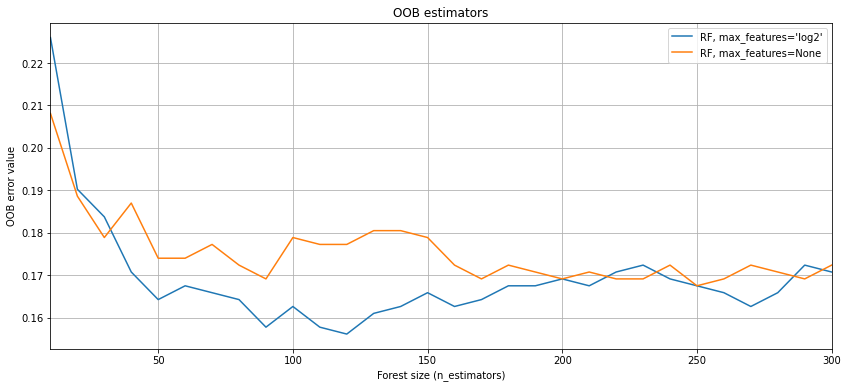

In [94]:
plt.figure(figsize=(14, 6))
plt.title('OOB estimators')
for label, clf_err in errors.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Forest size (n_estimators)")
plt.ylabel("OOB error value")
plt.legend()
plt.grid()
plt.show()